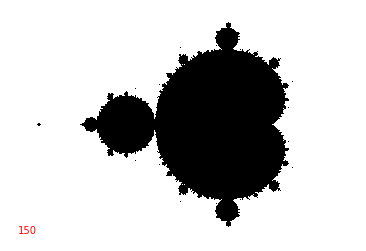

In [4]:
from __future__ import division
 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
 
class AnimatedGif:
    def __init__(self, size=(640, 480)):
        self.fig = plt.figure()
        self.fig.set_size_inches(size[0] / 100, size[1] / 100)
        ax = self.fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1)
        ax.set_xticks([])
        ax.set_yticks([])
        self.images = []
 
    def add(self, image, label=''):
        plt_im = plt.imshow(image, cmap='Greys', vmin=0, vmax=1, animated=True)
        plt_txt = plt.text(10, 310, label, color='red')
        self.images.append([plt_im, plt_txt])
 
    def save(self, filename):
        animation = anim.ArtistAnimation(self.fig, self.images)
        animation.save(filename, writer='pillow', fps=1)
 
m = 480
n = 320
x = np.linspace(-2, 1, num=m).reshape((1, m))
y = np.linspace(-1, 1, num=n).reshape((n, 1))
C = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))
Z = np.zeros((n, m), dtype=complex)
M = np.full((n, m), True, dtype=bool)
 
animated_gif = AnimatedGif(size=(m, n))
animated_gif.add(M, label='0')
images = []
for i in range(1, 151):
    Z[M] = Z[M] * Z[M] + C[M]
    M[np.abs(Z) > 2] = False
    if i <= 15 or not (i % 10):
        animated_gif.add(M, label=str(i))
 
animated_gif.save('mandelbrot-animated.gif')
